### Importing Packages


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from tqdm import tqdm
import scipy.stats
pd.options.mode.chained_assignment = None  # default='warn'

### Connecting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Getting Data


In [ ]:
BTC_URL = 'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1420070400&period2=1609372800&interval=1d&events=history&includeAdjustedClose=true'
NIFTY_URL = 'https://query1.finance.yahoo.com/v7/finance/download/%5ENSEI?period1=1420070400&period2=1609372800&interval=1d&events=history&includeAdjustedClose=true'
NASDAQ_URL = 'https://query1.finance.yahoo.com/v7/finance/download/%5EIXIC?period1=1420070400&period2=1609372800&interval=1d&events=history&includeAdjustedClose=true'
NEWS_URL = 'https://dataverse.harvard.edu/file.xhtml?fileId=4460084&version=5.0#'

In [ ]:
btc_data = pd.read_csv(BTC_URL)

### Data Summary

In [ ]:
#Data Head
btc_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2187,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,6.647990e+10
2188,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,4.905674e+10
2189,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,4.526595e+10
2190,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,5.128744e+10
2191,2020-12-31,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,4.675496e+10


In [ ]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2192 non-null   object 
 1   Open       2188 non-null   float64
 2   High       2188 non-null   float64
 3   Low        2188 non-null   float64
 4   Close      2188 non-null   float64
 5   Adj Close  2188 non-null   float64
 6   Volume     2188 non-null   float64
dtypes: float64(6), object(1)
memory usage: 120.0+ KB


In [ ]:
btc_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2.188000e+03
mean,5133.459631,5264.563452,5000.884121,5146.439290,5146.439290,9.507504e+09
std,4813.583882,4957.259934,4673.902393,4839.455982,4839.455982,1.293096e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,581.782013,588.434998,575.025741,581.684021,581.684021,7.439983e+07
50%,4098.749267,4210.345704,4007.764160,4106.032226,4106.032226,3.775635e+09
75%,8617.014893,8807.588379,8371.682129,8657.870361,8657.870361,1.646926e+10
max,28841.574219,29244.876953,28201.992188,29001.720703,29001.720703,7.415677e+10


### Preprocessing Data

In [ ]:
#Convert Date to Date Type
btc_data['Date']=btc_data['Date'].astype('datetime64')

In [ ]:
btc_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [ ]:
btc_data = btc_data.set_index(btc_data['Date'])

In [ ]:
#Removing NULL Values (not required)
#Normalizing the data (not required)

In [ ]:
#To Do
# 1. Create a months column

### Visualizing Bitcoin Prices

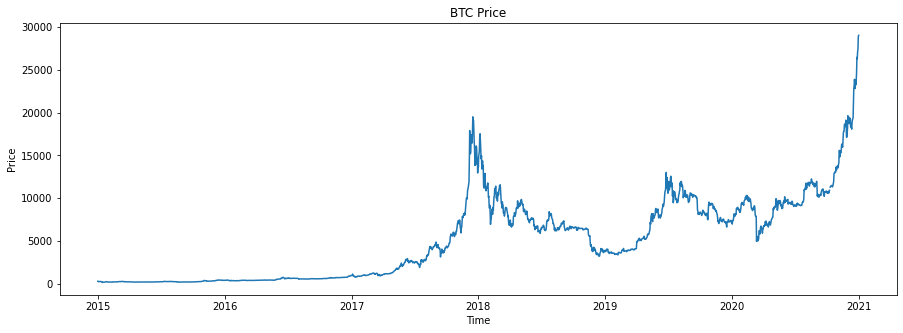

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(btc_data['Date'],btc_data['Close'])
plt.title('BTC Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

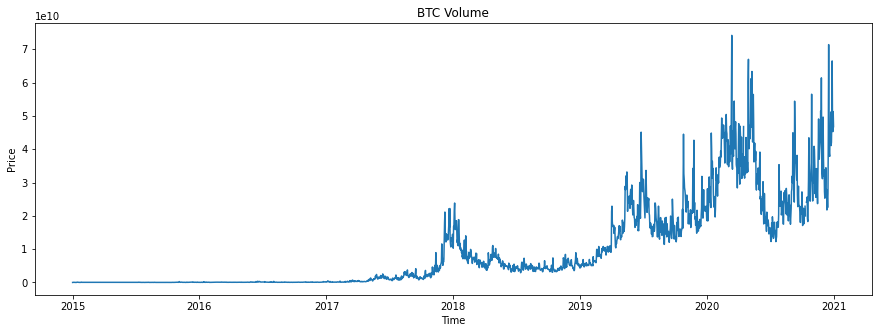

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(btc_data['Date'],btc_data['Volume'])
plt.title('BTC Volume')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

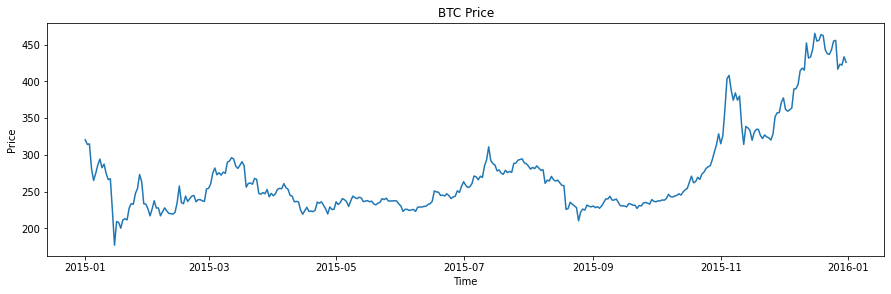

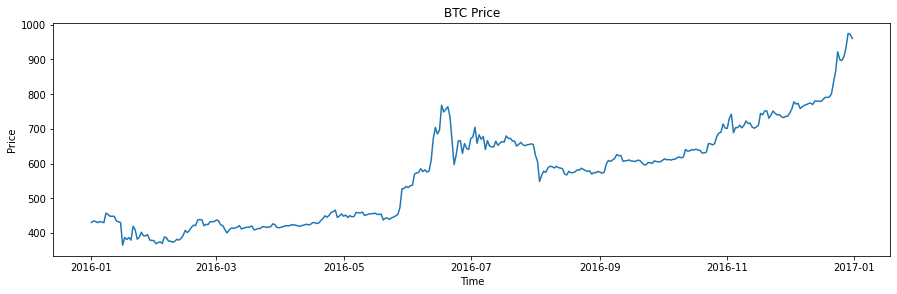

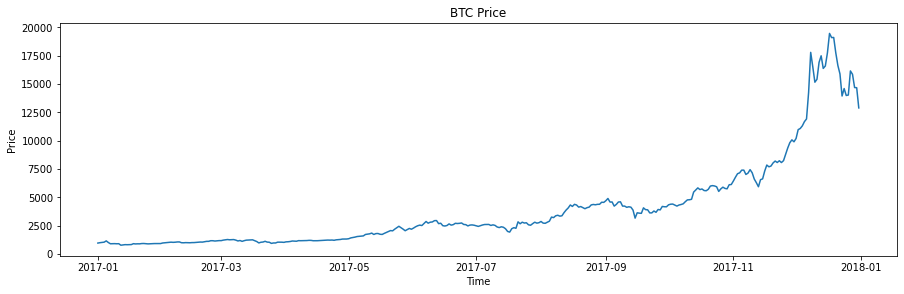

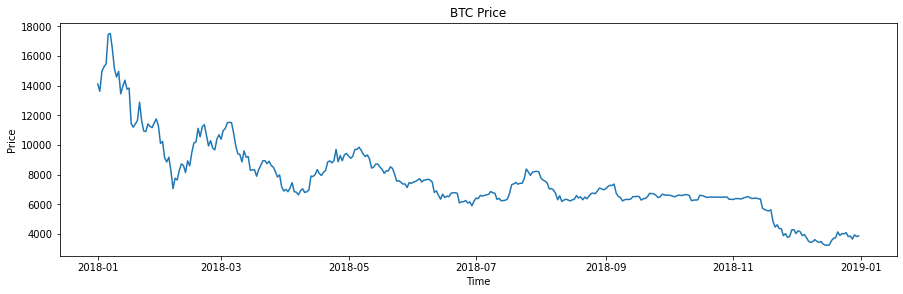

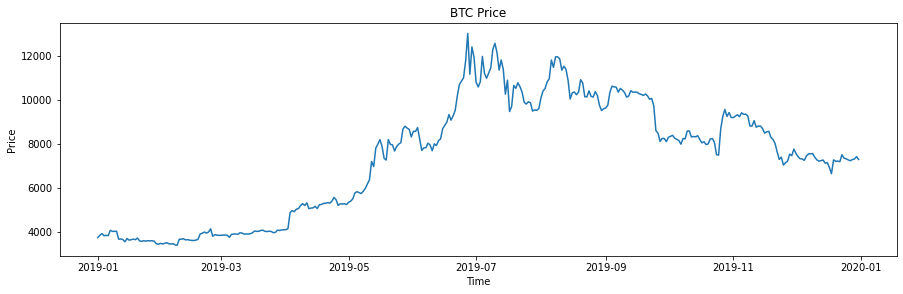

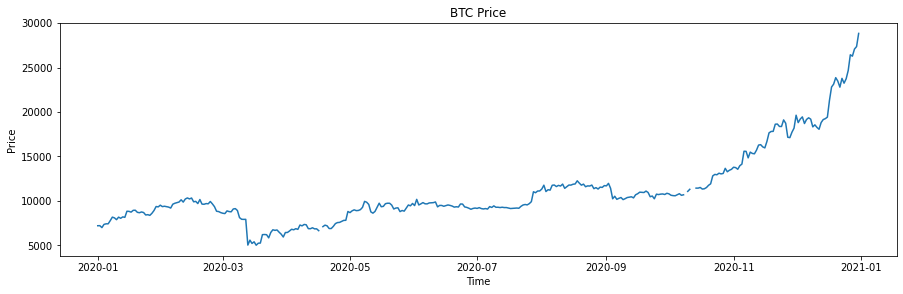

In [ ]:
plt.rcParams["figure.figsize"] = (15,30)
for i in range(6):
  plt.subplot(6, 1, i+1)
  plt.plot(btc_data[str(i+2015)+'-01-01':str(i+2015)+'-12-31']['Date'],btc_data[str(i+2015)+'-01-01':str(i+2015)+'-12-31']['Open'])
  plt.title('BTC Price')
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.show()

### Correlation Between Price and Volume

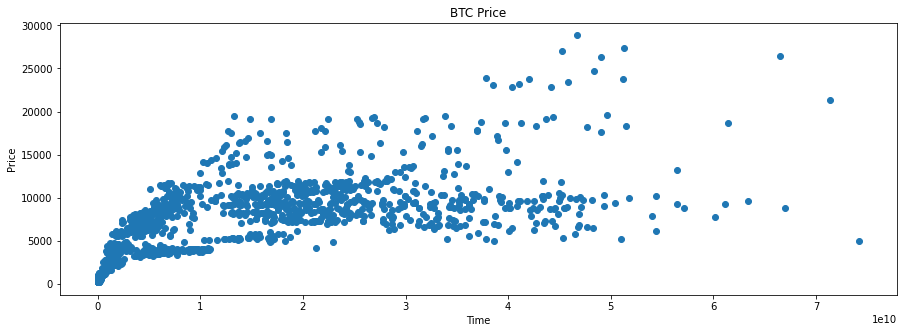

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(btc_data['Volume'],btc_data['Open'])
plt.title('BTC Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

We can say that as market volume increased, the BTC Volatality also increased

### Importing News Dataset

In [ ]:
news = pd.read_csv('/content/drive/MyDrive/DataVis Data/abcnews-date-text.csv')

### Preprocessing News Data

In [ ]:
news.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
news.rename(columns={'publish_date':'Date','headline_text':'Headline'},inplace=True)
news.head()

,Date,Headline
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
news.dtypes

Date         int64
Headline    object
dtype: object

In [ ]:
#Converts float to Date
news['Date']=pd.to_datetime(news['Date'],format='%Y%m%d')
news.dtypes

Date        datetime64[ns]
Headline            object
dtype: object

In [ ]:
news.head()

,Date,Headline
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [ ]:
news.set_index('Date',inplace=True)
news = news['2015-01-01':'2020-12-31']
news.head()

,Headline
Date,
2015-01-01,1000s celebrate nye in adelaide
2015-01-01,1984 qld cabinet papers released
2015-01-01,2014 year in interactive storytelling
2015-01-01,35 dead in shanghai new year stampede
2015-01-01,airasia qz8501 first two bodies arrive in sura...


### Finding News Polarity

In [ ]:
#Vader Algoritm
blobs = [TextBlob(news['Headline'][i]) for i in tqdm(range(news.shape[0]))]
polarity = [blob.polarity for blob in tqdm(blobs)]

100%|██████████| 300778/300778 [00:55<00:00, 5395.69it/s]


In [ ]:
news['Polarity'] = polarity

In [ ]:
news.head()

,Headline,Polarity
Date,,
2015-01-01,1000s celebrate nye in adelaide,0.000000
2015-01-01,1984 qld cabinet papers released,0.000000
2015-01-01,2014 year in interactive storytelling,0.000000
2015-01-01,35 dead in shanghai new year stampede,-0.031818
2015-01-01,airasia qz8501 first two bodies arrive in sura...,0.250000


### Grouping News Data by Date and finding mean Polarity

In [ ]:
news_polarities=news.groupby('Date').mean()
news_polarities.tail()

,Polarity
Date,
2020-12-27,-0.007455
2020-12-28,0.023704
2020-12-29,0.009022
2020-12-30,0.049853
2020-12-31,0.044833


### Normalizing BTC Data


In [ ]:
btc_data_2015 = btc_data['2015-01-01':'2015-12-31']
btc_data_2016 = btc_data['2016-01-01':'2016-12-31']
btc_data_2017 = btc_data['2017-01-01':'2017-12-31']
btc_data_2018 = btc_data['2018-0https://youtu.be/WqfIS7orQjU1-01':'2018-12-31']
btc_data_2019 = btc_data['2019-01-01':'2019-12-31']
btc_data_2020 = btc_data['2020-01-01':'2020-12-31']

In [ ]:
#To DO: Find for 2016 to 2020
btc_data_2015['Open Normalized'] = (btc_data_2015['Open'] - btc_data_2015['Open'].mean())/(btc_data_2015['Open'].std())
btc_data_2016['Open Normalized'] = (btc_data_2016['Open'] - btc_data_2016['Open'].mean())/(btc_data_2016['Open'].std())
btc_data_2017['Open Normalized'] = (btc_data_2017['Open'] - btc_data_2017['Open'].mean())/(btc_data_2017['Open'].std())
btc_data_2018['Open Normalized'] = (btc_data_2018['Open'] - btc_data_2018['Open'].mean())/(btc_data_2018['Open'].std())
btc_data_2019['Open Normalized'] = (btc_data_2019['Open'] - btc_data_2019['Open'].mean())/(btc_data_2019['Open'].std())
btc_data_2020['Open Normalized'] = (btc_data_2020['Open'] - btc_data_2020['Open'].mean())/(btc_data_2020['Open'].std())

In [ ]:
#To DO: Find for 2016 to 2020
btc_data_2015['Volume Normalized'] = (btc_data_2015['Volume'] - btc_data_2015['Volume'].mean())/(btc_data_2015['Volume'].std())
btc_data_2016['Volume Normalized'] = (btc_data_2016['Volume'] - btc_data_2016['Volume'].mean())/(btc_data_2016['Volume'].std())
btc_data_2017['Volume Normalized'] = (btc_data_2017['Volume'] - btc_data_2017['Volume'].mean())/(btc_data_2017['Volume'].std())
btc_data_2018['Volume Normalized'] = (btc_data_2018['Volume'] - btc_data_2018['Volume'].mean())/(btc_data_2018['Volume'].std())
btc_data_2019['Volume Normalized'] = (btc_data_2019['Volume'] - btc_data_2019['Volume'].mean())/(btc_data_2019['Volume'].std())
btc_data_2020['Volume Normalized'] = (btc_data_2020['Volume'] - btc_data_2020['Volume'].mean())/(btc_data_2020['Volume'].std())

### Normalizing News Polarities

In [ ]:
news_polarities = (news_polarities - news_polarities.mean())/(news_polarities.std())
news_p = news_polarities.reset_index()
news_p.head()

,Date,Polarity
0,2015-01-01,0.486202
1,2015-01-02,0.525448
2,2015-01-03,-0.125111
3,2015-01-04,-0.701990
4,2015-01-05,-0.720196


### Plotting Polarity Vs Price (Normalized)

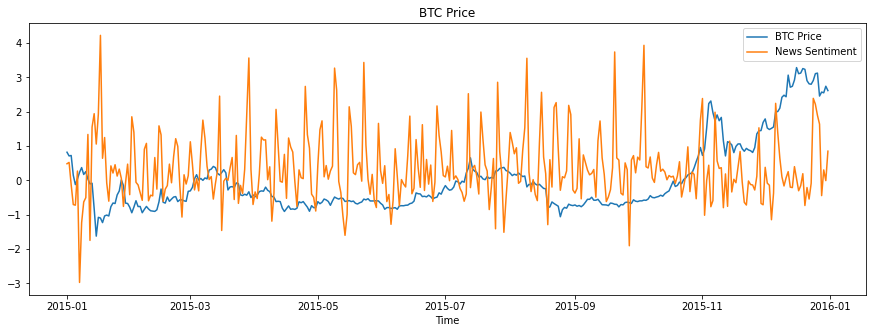

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(btc_data_2015['Date'],btc_data_2015['Open Normalized'], label='BTC Price')
plt.plot(news_polarities['2015-01-01':'2015-12-31'], label='News Sentiment')
plt.title('BTC Price')
plt.xlabel('Time')
plt.legend()
plt.show()

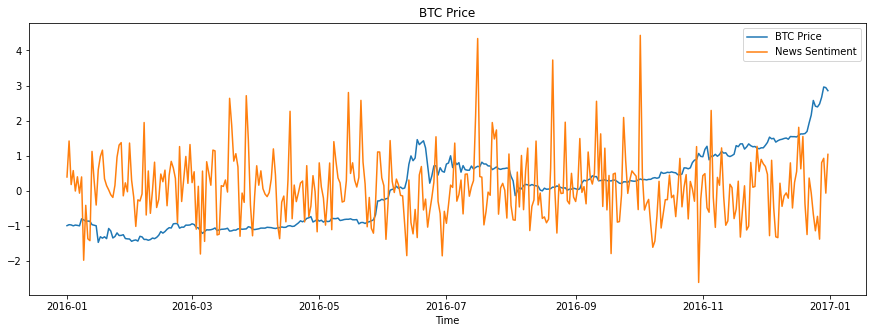

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(btc_data_2016['Date'],btc_data_2016['Open Normalized'], label='BTC Price')
plt.plot(news_polarities['2016-01-01':'2016-12-31'], label='News Sentiment')
plt.title('BTC Price')
plt.xlabel('Time')
plt.legend()
plt.show()

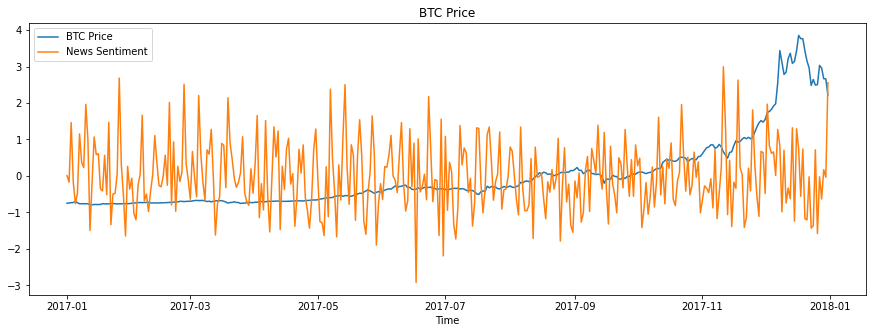

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(btc_data_2017['Date'],btc_data_2017['Open Normalized'], label='BTC Price')
plt.plot(news_polarities['2017-01-01':'2017-12-31'], label='News Sentiment')
plt.title('BTC Price')
plt.xlabel('Time')
plt.legend()
plt.show()

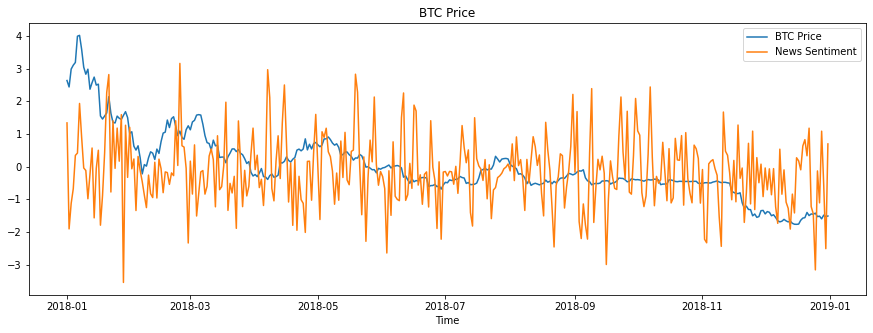

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(btc_data_2018['Date'],btc_data_2018['Open Normalized'], label='BTC Price')
plt.plot(news_polarities['2018-01-01':'2018-12-31'], label='News Sentiment')
plt.title('BTC Price')
plt.xlabel('Time')
plt.legend()
plt.show()

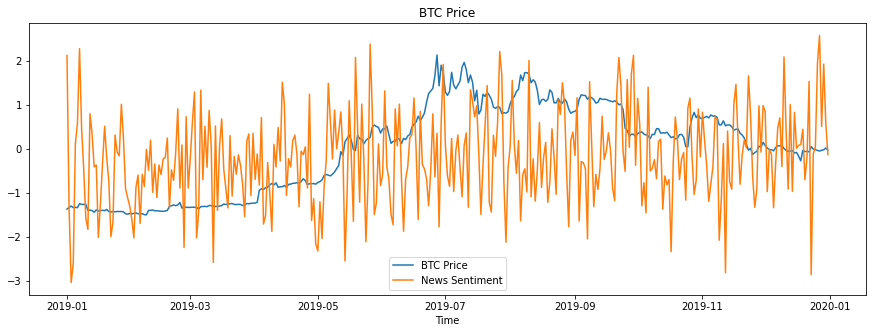

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(btc_data_2019['Date'],btc_data_2019['Open Normalized'], label='BTC Price')
plt.plot(news_polarities['2019-01-01':'2019-12-31'], label='News Sentiment')
plt.title('BTC Price')
plt.xlabel('Time')
plt.legend()
plt.show()

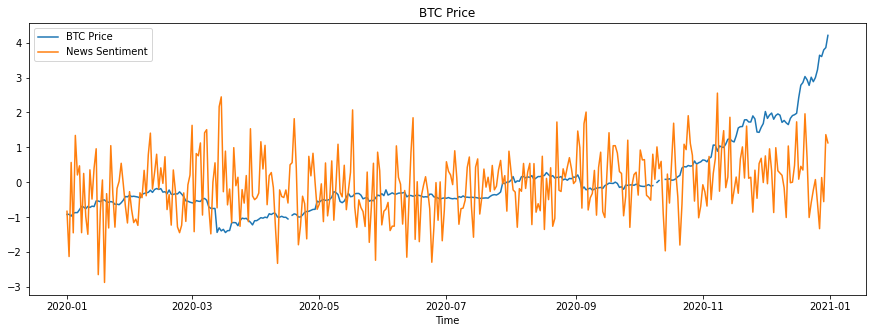

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(btc_data_2020['Date'],btc_data_2020['Open Normalized'], label='BTC Price')
plt.plot(news_polarities['2020-01-01':'2020-12-31'], label='News Sentiment')
plt.title('BTC Price')
plt.xlabel('Time')
plt.legend()
plt.show()

### Scatter Plot for Polarity vs Price

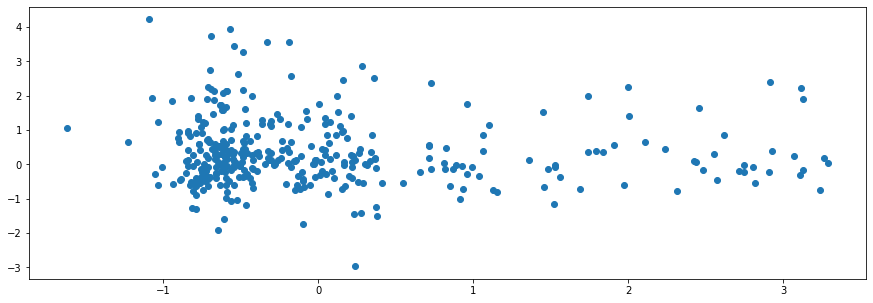

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(btc_data_2015['Open Normalized'], news_polarities['2015-01-01':'2015-12-31'])
plt.show()

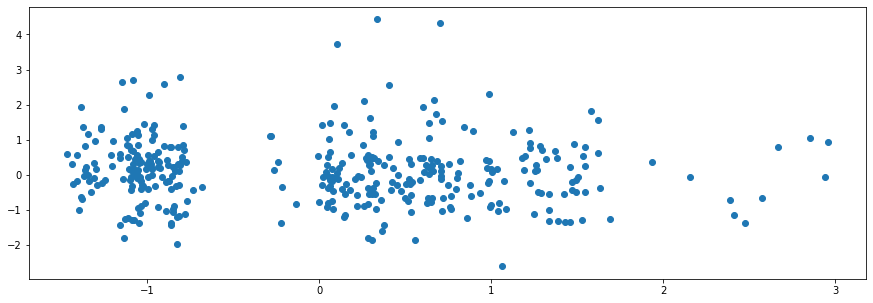

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(btc_data_2016['Open Normalized'], news_polarities['2016-01-01':'2016-12-31'])
plt.show()

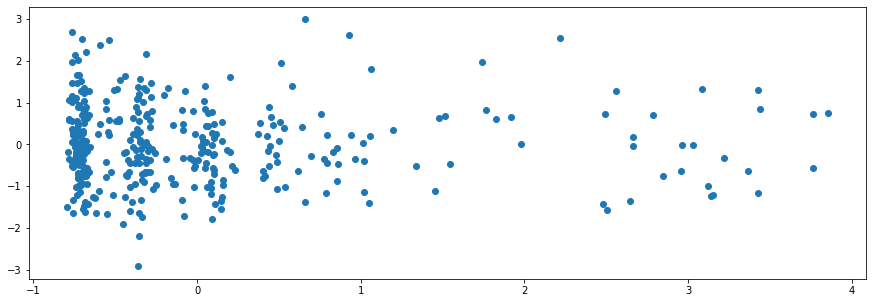

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(btc_data_2017['Open Normalized'], news_polarities['2017-01-01':'2017-12-31'])
plt.show()

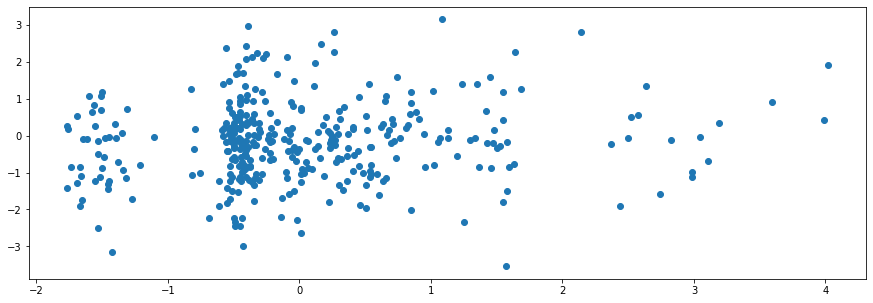

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(btc_data_2018['Open Normalized'], news_polarities['2018-01-01':'2018-12-31'])
plt.show()

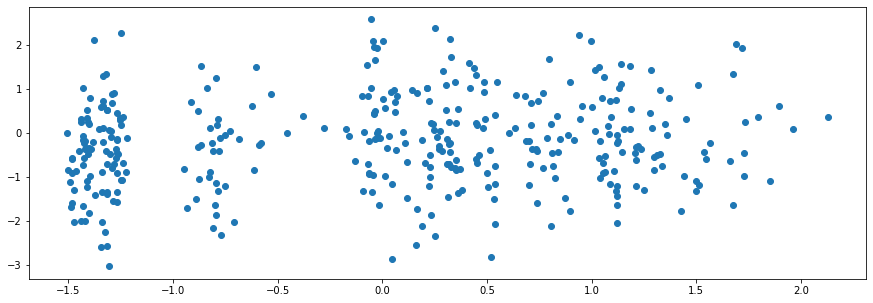

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(btc_data_2019['Open Normalized'], news_polarities['2019-01-01':'2019-12-31'])
plt.show()

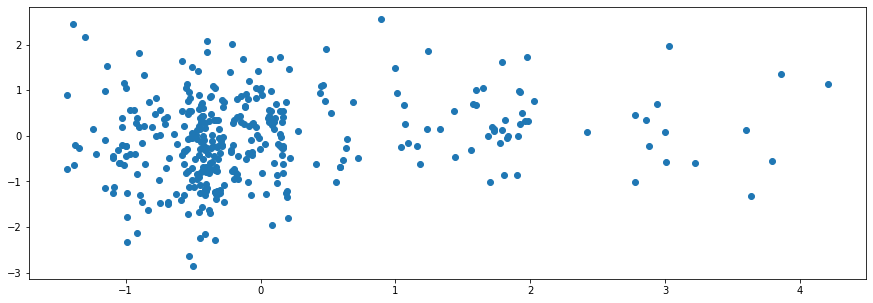

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(btc_data_2020['Open Normalized'], news_polarities['2020-01-01':'2020-12-31'])
plt.show()

### Polarity vs Volume

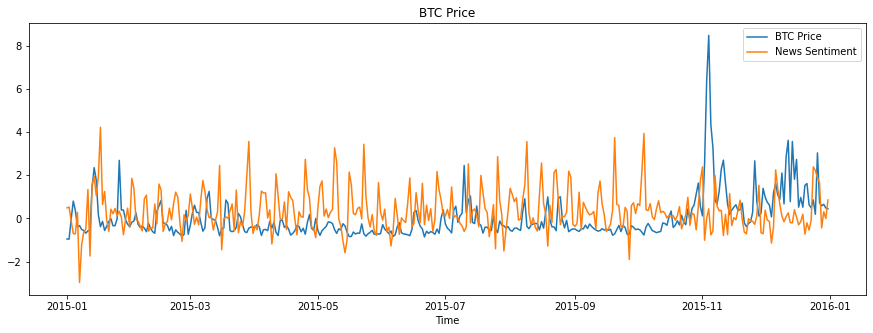

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(btc_data_2015['Date'],btc_data_2015['Volume Normalized'], label='BTC Price')
plt.plot(news_polarities['2015-01-01':'2015-12-31'], label='News Sentiment')
plt.title('BTC Price')
plt.xlabel('Time')
plt.legend()
plt.show()

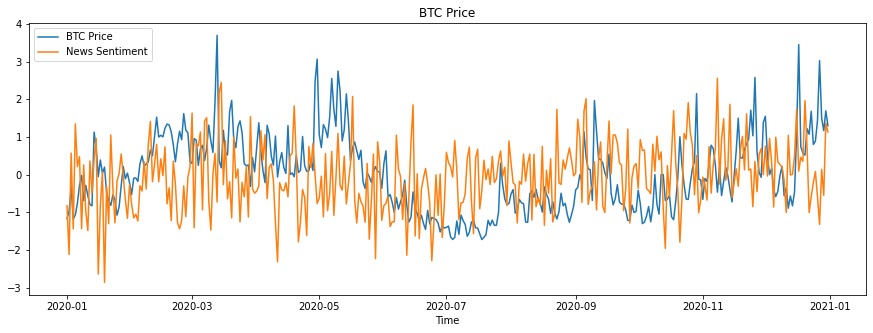

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(btc_data_2020['Date'],btc_data_2020['Volume Normalized'], label='BTC Price')
plt.plot(news_polarities['2020-01-01':'2020-12-31'], label='News Sentiment')
plt.title('BTC Price')
plt.xlabel('Time')
plt.legend()
plt.show()

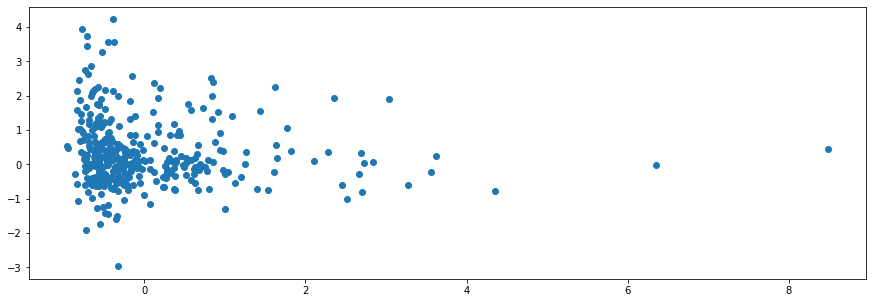

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.scatter(btc_data_2015['Volume Normalized'], news_polarities['2015-01-01':'2015-12-31'])
plt.show()

In [ ]:
btc_data_2020['Open Normalized'].fillna(btc_data_2020['Open Normalized'].mean(),inplace=True)
btc_data_2020['Volume Normalized'].fillna(btc_data_2020['Volume Normalized'].mean(),inplace=True)

### Covarieance Volume and Sentiment

In [ ]:
scipy.stats.pearsonr(news_polarities['2015-01-01':'2015-12-31'].to_numpy().reshape(365,), btc_data_2015['Volume Normalized'].to_numpy().reshape(365,))

(-0.08863510086417146, 0.09085738530211297)

In [ ]:
scipy.stats.pearsonr(news_polarities['2017-01-01':'2017-12-31'].to_numpy().reshape(365,), btc_data_2017['Volume Normalized'].to_numpy().reshape(365,))

(-0.012111827567156085, 0.8176171019345899)

In [ ]:
scipy.stats.pearsonr(news_polarities['2018-01-01':'2018-12-31'].to_numpy().reshape(365,), btc_data_2018['Volume Normalized'].to_numpy().reshape(365,))

(0.003533326019494998, 0.9463645579858444)

In [ ]:
scipy.stats.pearsonr(news_polarities['2019-01-01':'2019-12-31'].to_numpy().reshape(365,), btc_data_2019['Volume Normalized'].to_numpy().reshape(365,))

(0.10870703900438926, 0.03790534651245967)

### Covarience Price and Sentiment

In [ ]:
scipy.stats.pearsonr(news_polarities['2015-01-01':'2015-12-31'].to_numpy().reshape(365,), btc_data_2015['Open Normalized'].to_numpy().reshape(365,))

(-0.06097131857554322, 0.24525936078589977)

In [ ]:
scipy.stats.pearsonr(news_polarities['2017-01-01':'2017-12-31'].to_numpy().reshape(365,), btc_data_2017['Open Normalized'].to_numpy().reshape(365,))

(-0.015560700887151984, 0.7670124403271178)

In [ ]:
scipy.stats.pearsonr(news_polarities['2018-01-01':'2018-12-31'].to_numpy().reshape(365,), btc_data_2018['Open Normalized'].to_numpy().reshape(365,))

(0.10803502561386819, 0.039115658055864574)

In [ ]:
scipy.stats.pearsonr(news_polarities['2019-01-01':'2019-12-31'].to_numpy().reshape(365,), btc_data_2019['Open Normalized'].to_numpy().reshape(365,))

(0.14152758861360398, 0.0067638821849249)

In [ ]:
scipy.stats.pearsonr(news_polarities['2020-01-01':'2020-12-31'].to_numpy().reshape(366,), btc_data_2020['Open Normalized'].to_numpy().reshape(366,))

(0.17062330736151615, 0.0010487455159643407)

## Conclusion

As the impact of social media and internet is increasing, so is the dependance of Crypto Market is increasing on News

### Prediction Model with LTSM and RNN